# Proyecto Inteligencia Computacional 

In [1]:
import pandas as pd 
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feats = pd.read_parquet('./data/features.parquet') 
lcs = pd.read_parquet('./data/lcs.parquet') 
oids = pd.read_parquet('./data/oids.parquet')

## Manejo de los Datos

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)

In [53]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)
df_feats_for_forest = df_feats_class[df_feats_class.columns[1:]]
arr_class = df_feats_for_forest[df_feats_for_forest.columns[0]].values
df_feats_class

,oid,alerceclass,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,...,max_diffmaglim_after_fid_g,median_diffmaglim_after_fid_g,delta_mag_fid_r,delta_mjd_fid_r,first_mag_r,mean_mag_r,min_mag_r,n_det_r,PercentAmplitude_r,Harmonics_mag_5_r
0,ZTF17aaaaafz,LPV,1.464396,0.215017,-0.173195,-0.741959,0.976239,0.900859,1.0,0.002542,...,20.823200,19.508801,4.200617,1339.718634,17.564814,18.677803,16.661703,628.0,0.112910,0.270302
1,ZTF17aaaaajg,RRL,0.366083,0.104706,0.405444,-1.552645,0.192603,0.883649,1.0,0.000132,...,21.066299,20.175400,0.580561,1251.693287,16.485819,16.641393,16.403305,320.0,0.027691,0.009083
2,ZTF17aaaaavq,LPV,2.839326,0.314243,0.001261,-1.538020,1.494441,0.800329,1.0,0.009013,...,21.126600,20.008301,5.057098,1434.977350,16.880259,15.694755,13.155277,656.0,0.180732,0.105483
3,ZTF17aaaacth,EB,0.029942,0.087856,2.875995,8.698949,0.476514,0.543303,1.0,0.000773,...,20.865801,19.922400,2.519390,1189.854849,16.813747,17.039993,16.799618,93.0,0.145533,0.028314
4,ZTF17aaaadmx,LPV,1.512813,0.298351,-0.484697,-0.732266,1.037921,0.791008,1.0,0.004826,...,20.916500,19.762699,5.000990,1338.672627,13.901798,14.856612,12.674696,479.0,0.172507,0.097117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,ZTF21abblixa,CEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.019199,19.309700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,ZTF21abbvvji,RRL,0.389800,0.259549,0.506888,-1.274300,0.202627,0.925235,1.0,0.000000,...,20.693900,20.560050,0.483679,28.936458,16.840920,17.002280,16.805649,8.0,0.024969,3.964182
8416,ZTF21abbzxoh,DSCT,0.457832,0.359654,0.324823,-1.448713,0.219106,0.893713,1.0,0.000203,...,20.815800,20.049101,0.595043,353.070185,15.650616,15.353477,15.068784,24.0,0.024223,2.072808
8417,ZTF21abcgftb,RRL,0.347692,0.136953,0.130523,-0.614194,0.192589,0.830999,1.0,0.000217,...,20.883900,20.081400,0.794328,375.932407,13.234352,13.045922,12.675948,24.0,0.034678,0.022427


In [54]:
# Suponiendo que 'feats' es tu DataFrame y 'target' es la columna de etiquetas
X_forest = df_feats_for_forest.drop(columns=['alerceclass'])  # Reemplaza 'target' con el nombre de tu columna de etiquetas
y_forest = df_feats_for_forest['alerceclass']  # Reemplaza 'target' con el nombre de tu columna de etiquetas

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, 
                            criterion="gini",
                            max_features="sqrt",
                            bootstrap=True,
                            max_samples=2/3,
                            oob_score=True,
                            random_state=42
                            ,class_weight="balanced")
clf.fit(X_forest, y_forest)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
115,Multiband_period_g_r,0.077157
117,Period_band_g,0.061812
119,Period_band_r,0.056347
48,g-r_mean_g_r,0.033195
49,g-r_max_corr_g_r,0.031238
...,...,...
27,SPM_tau_rise_r,0.000592
56,MHPS_PN_flag_g,0.000365
76,Pvar_g,0.000180
6,Pvar_r,0.000152


In [55]:
# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance = importance.sort_values(by='Importance', ascending=False)

# Calcular la suma acumulada de importancia
importance['Cumulative Importance'] = importance['Importance'].cumsum()

# Encontrar la posición donde la suma acumulada alcanza
threshold_position = (importance['Cumulative Importance'] <= 0.75).sum()

# Mostrar la tabla y la posición
print(importance)
print(f"La suma acumulada alcanza el 75% en la posición: {threshold_position}")

                  Feature  Importance  Cumulative Importance
115  Multiband_period_g_r    0.077157               0.077157
117         Period_band_g    0.061812               0.138969
119         Period_band_r    0.056347               0.195316
48           g-r_mean_g_r    0.033195               0.228511
49       g-r_max_corr_g_r    0.031238               0.259749
..                    ...         ...                    ...
27         SPM_tau_rise_r    0.000592               0.999187
56         MHPS_PN_flag_g    0.000365               0.999552
76                 Pvar_g    0.000180               0.999732
6                  Pvar_r    0.000152               0.999884
61         MHPS_PN_flag_r    0.000116               1.000000

[178 rows x 3 columns]
La suma acumulada alcanza el 75% en la posición: 52


In [56]:
importance_df_ = importance_df[importance_df.columns[:-1]].head(52)
importance_arr = importance_df_["Feature"].values

df_feats_for_auto = df_feats_for_forest[importance_arr]
df_feats_for_auto.insert(0, "alerceclass", df_feats_for_forest['alerceclass'].values)
df_feats_for_auto

,alerceclass,Multiband_period_g_r,Period_band_g,Period_band_r,g-r_mean_g_r,g-r_max_corr_g_r,g-W2,g-r_mean_corr_g_r,GP_DRW_tau_g,g-r_max_g_r,...,MedianAbsDev_g,Amplitude_r,delta_mag_fid_r,iqr_g,Power_rate_2_g_r,Harmonics_mse_g,n_neg_r,Psi_CS_g,SF_ML_amplitude_g,n_det_g
0,LPV,0.998056,0.999001,0.998056,1.435857,1.250542,9.565536,1.535733,41.886814,1.060522,...,0.537737,1.760719,4.200617,1.151550,0.005793,1.082883,551.0,0.160312,2.436400,387.0
1,RRL,0.374650,0.374650,0.374650,-0.031629,0.082634,1.225796,0.098403,0.235621,-0.144400,...,0.148479,0.271345,0.580561,0.375387,0.031407,0.004386,134.0,0.416710,0.295651,233.0
2,LPV,275.362316,275.362316,275.362316,2.523045,2.055053,11.888458,2.705704,445.876352,1.993020,...,1.756824,2.278013,5.057098,3.859669,0.003611,0.134893,302.0,0.274040,11.396263,619.0
3,EB,0.109562,0.109562,0.842423,-0.251640,0.406408,2.677564,1.086571,0.113667,0.262726,...,0.434101,0.839141,2.519390,0.978395,0.020082,1.775440,15.0,0.343254,2.487437,22.0
4,LPV,0.498661,0.498661,0.498661,3.434069,3.137792,14.166490,3.518878,952.389572,2.788825,...,0.626677,1.745407,5.000990,1.258825,0.049548,0.899158,392.0,0.247893,4.454466,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,CEP,11.564211,11.564211,NaN,NaN,NaN,NaN,NaN,1.027615,NaN,...,0.143101,NaN,NaN,0.827574,0.000000,0.000048,NaN,0.293647,0.884662,17.0
8415,RRL,0.299751,0.299751,0.427716,-0.264118,-0.060133,0.748859,0.022580,0.065763,-0.449000,...,0.142511,0.241840,0.483679,0.533189,0.036893,0.000000,3.0,0.343403,0.240878,10.0
8416,DSCT,0.063881,0.073249,0.079062,0.493911,0.090625,1.412304,0.419827,0.114303,-0.179602,...,0.066546,0.290247,0.595043,0.329879,0.015249,0.001012,8.0,0.300656,0.361606,22.0
8417,RRL,0.357062,0.357062,0.357062,-0.127374,0.159251,1.051033,0.070111,0.356889,0.545899,...,0.149581,0.298825,0.794328,0.412966,0.001116,0.000560,12.0,0.330881,0.277380,38.0


In [57]:
df_feats_for_auto['oid'] = df_feats_class['oid']
df_feats_for_auto_no_oid = df_feats_for_auto.drop(columns=['oid'])

C:\Users\icali\AppData\Local\Temp\ipykernel_19316\3508390410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feats_for_auto['oid'] = df_feats_class['oid']


In [85]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

#Primero definimos un conjunto test balanceado con 60 elementos de cada clase
df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
df_test_no_oid = df_test.drop(columns=['oid'])
X_test = df_test_no_oid.drop(columns=['alerceclass'])
y_test = df_test_no_oid['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto = pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)

df_val = df_auto.groupby('alerceclass').apply(lambda x: x.sample(n=80, random_state=42)).reset_index(drop=True)
df_val_no_oid = df_val.drop(columns=['oid'])
X_val = df_val_no_oid.drop(columns=['alerceclass'])
y_val = df_val_no_oid['alerceclass']

df_train = pd.concat([df_auto,df_val]).drop_duplicates(keep=False)
df_train_no_oid = df_train.drop(columns=['oid'])
X_train = df_train_no_oid.drop(columns=['alerceclass'])
y_train = df_train_no_oid['alerceclass']


#Imputar los NaN por el valor más frecuente en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_val = imputer.transform(X_val)
imputed_X_test = imputer.transform(X_test)

# Normalizar los datos usando las constantes del conjunto de entrenamiento
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(imputed_X_train)
X_val = scaler.transform(imputed_X_val)
X_test = scaler.transform(imputed_X_test)

#Función para realizar upsampling
def upsample_data(X, y):
    df = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
    class_counts = y.value_counts()
    max_class_count = class_counts.max()
    
    df_upsampled = pd.DataFrame()
    for class_label in class_counts.index:
        df_class = df[df['alerceclass'] == class_label]
        df_class_upsampled = resample(df_class, 
                                      replace=True,  # Muestreo con reemplazo
                                      n_samples=max_class_count,  # Número de muestras igual a la clase mayoritaria
                                      random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_class_upsampled], axis=0)
    
    df_upsampled = shuffle(df_upsampled, random_state=42)
    return df_upsampled.drop(columns=['alerceclass']).values, df_upsampled['alerceclass']

# Realizar upsampling en el conjunto de entrenamiento
X_train, y_train = upsample_data(scaled_X_train, y_train)


# Mostrar los resultados
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de validación:")
print(y_val.value_counts())
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())

C:\Users\icali\AppData\Local\Temp\ipykernel_19316\2428626423.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)
C:\Users\icali\AppData\Local\Temp\ipykernel_19316\2428626423.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_val = df_auto.groupby('alerceclass').apply(lambda x: x.sa

Distribución de clases en el conjunto de entrenamiento:
alerceclass
RRL     2559
DSCT    2559
EB      2559
CEP     2559
LPV     2559
Name: count, dtype: int64

Distribución de clases en el conjunto de validación:
alerceclass
CEP     80
DSCT    80
EB      80
LPV     80
RRL     80
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
alerceclass
CEP     50
DSCT    50
EB      50
LPV     50
RRL     50
Name: count, dtype: int64


## MCDSVDD

### Autoencoder

In [128]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import umap
import matplotlib.pyplot as plt

class AutoencoderMCDSVDD(nn.Module):
    def __init__(self, input_dim, z_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 50),
            nn.LayerNorm(50),
            nn.ELU(),
            nn.Linear(50, 45),
            nn.LayerNorm(45),
            nn.ELU(),
            nn.Linear(45, 35),
            nn.LayerNorm(35),
            nn.ELU(),
            nn.Linear(35, z_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(z_dim, 35),
            nn.LayerNorm(35),
            nn.ELU(),
            nn.Linear(35, 45),
            nn.LayerNorm(45),
            nn.ELU(),
            nn.Linear(45, 50),
            nn.LayerNorm(50),
            nn.ELU(),
            nn.Linear(50, input_dim)
        )
    

    def forward(self, x):
        z = self.encoder(x)
        z = self.decoder(z)
        return z

    def latent_space(self, x):
        with torch.no_grad():
            return self.encoder(x)
    
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)    

#TENSORES
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

#DATASETS
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_dataset_autoencoder = TensorDataset(X_train_tensor, X_train_tensor)
val_dataset_autoencoder = TensorDataset(X_val_tensor, X_val_tensor)
test_dataset_autoencoder = TensorDataset(X_test_tensor, X_test_tensor)


input_dim = X_train_tensor.shape[1]
z_dim = 30
n_classes = len(np.unique(y_train_encoded))

lr = 0.0001
batch_size = 64
#criterion = nn.MSELoss()
criterion = nn.L1Loss()  # Mean Absolute Error
early_stopping_tolerance = 10
epochs = 50

curves_aemcdsvdd = {
    "train_loss": [],
    "val_loss": []
}

input_dim = X_train_tensor.shape[1]
ae_mcdsvdd = AutoencoderMCDSVDD(input_dim, z_dim)

optimizer = optim.Adam(ae_mcdsvdd.parameters(), lr=lr, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

for epoch in range(epochs):
    ae_mcdsvdd.train()
    running_loss_train = 0.0
    for inputs, _ in DataLoader(train_dataset_autoencoder, batch_size=batch_size, shuffle=True):
        optimizer.zero_grad()
        outputs = ae_mcdsvdd.forward(inputs)
        loss_train = criterion(outputs, inputs)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    epoch_loss_train = running_loss_train / len(train_dataset_autoencoder)
    curves_aemcdsvdd["train_loss"].append(epoch_loss_train)
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {epoch_loss_train}")

    #validamos modelo
    ae_mcdsvdd.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for inputs, _ in DataLoader(val_dataset_autoencoder, batch_size=batch_size, shuffle=False):
            outputs = ae_mcdsvdd.forward(inputs)
            loss_val = criterion(outputs, inputs)
            running_loss_val += loss_val.item() * inputs.size(0)
        epoch_loss_val = running_loss_val / len(val_dataset_autoencoder)
        curves_aemcdsvdd["val_loss"].append(epoch_loss_val)
        print(f"Epoch {epoch + 1}/{epochs} - Val Loss: {epoch_loss_val}")

torch.save(ae_mcdsvdd.state_dict(), 'ae_mcdsvdd.pth')

Epoch 1/50 - Train Loss: 0.5647970005794166
Epoch 1/50 - Val Loss: 0.4812262189388275
Epoch 2/50 - Train Loss: 0.43796304682820697
Epoch 2/50 - Val Loss: 0.4116476368904114
Epoch 3/50 - Train Loss: 0.3847390159306558
Epoch 3/50 - Val Loss: 0.3725221943855286
Epoch 4/50 - Train Loss: 0.3505837321654108
Epoch 4/50 - Val Loss: 0.34347220659255984
Epoch 5/50 - Train Loss: 0.3257195513758076
Epoch 5/50 - Val Loss: 0.32095440447330476
Epoch 6/50 - Train Loss: 0.30811985764665595
Epoch 6/50 - Val Loss: 0.30615913271903994
Epoch 7/50 - Train Loss: 0.29524430808679997
Epoch 7/50 - Val Loss: 0.29380311667919157
Epoch 8/50 - Train Loss: 0.2842778588724863
Epoch 8/50 - Val Loss: 0.2831924027204514
Epoch 9/50 - Train Loss: 0.2744256526359873
Epoch 9/50 - Val Loss: 0.2738809061050415
Epoch 10/50 - Train Loss: 0.26493994889197847
Epoch 10/50 - Val Loss: 0.26428980350494385
Epoch 11/50 - Train Loss: 0.25546334438861557
Epoch 11/50 - Val Loss: 0.2551993143558502
Epoch 12/50 - Train Loss: 0.246697152620

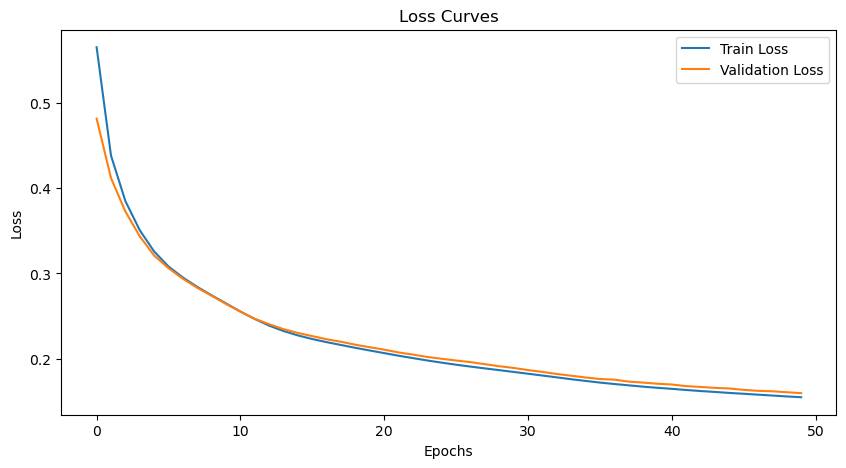

In [129]:
# Plotear las curvas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(curves_aemcdsvdd["train_loss"], label='Train Loss')
plt.plot(curves_aemcdsvdd["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

### Encoder-MCDSVDD

In [131]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import umap
import matplotlib.pyplot as plt

class MultiClassDeepSVDD(nn.Module):
    def __init__(self, input_dim, z_dim, n_classes):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 50),
            nn.LayerNorm(50),
            nn.ELU(),
            nn.Linear(50, 45),
            nn.LayerNorm(45),
            nn.ELU(),
            nn.Linear(45, 35),
            nn.LayerNorm(35),
            nn.ELU(),
            nn.Linear(35, z_dim)
        )
        self.c = None  # Centros inicializados en None
        self.n_classes = n_classes

    def forward(self, x):
        z = self.encoder(x)
        return z

    def set_c(self, dataloader, eps=0.01):
        latents, labels = self.get_latent_space(dataloader)
        c = []
        for i in range(self.n_classes):
            ixs = np.where(labels == i)
            c.append(torch.mean(latents[ixs], dim=0))
        c = torch.stack(c)
        for i in range(len(c)):
            c[i][(abs(c[i]) < eps) & (c[i] < 0)] = -eps
            c[i][(abs(c[i]) < eps) & (c[i] > 0)] = eps
        self.c = c.to(next(self.parameters()).device)

    def update_centers(self, dataloader):
        latents, labels = self.get_latent_space(dataloader)
        for i in range(self.n_classes):
            ixs = np.where(labels == i)
            self.c[i] = torch.mean(latents[ixs], dim=0).to(next(self.parameters()).device)

    def get_latent_space(self, dataloader):
        latents = []
        labels = []
        with torch.no_grad():
            for x, y in dataloader:
                x, y = x.to(next(self.parameters()).device), y.to(next(self.parameters()).device)
                z = self.forward(x)
                latents.append(z.detach().cpu())
                labels.append(y.detach().cpu())
        return torch.cat(latents), torch.cat(labels)

    def compute_loss(self, x, y):
        z = self.forward(x)
        loss = torch.mean(torch.sum((z - self.c[y]) ** 2, dim=1))
        return loss
    
    def compute_anomaly_score(self, z):
        """
        Calcula el puntaje de anomalía basado en la distancia al centro más cercano.
        """
        distances = torch.sum((z.unsqueeze(1) - self.c) ** 2, dim=2)  # Distancias a todos los centros
        scores = torch.min(distances, dim=1)[0]  # Escoge la distancia mínima
        return scores


    def set_anomaly_threshold(self, dataloader, percentile=95):
        """
        Determina el umbral de anomalía basado en los datos.
        """
        self.eval()
        anomaly_scores = []
        with torch.no_grad():
            for x, _ in dataloader:
                x = x.to(next(self.parameters()).device)
                z = self.encoder(x)  # Obtén el espacio latente
                scores = self.compute_anomaly_score(z)  # Puntaje de anomalía
                anomaly_scores.extend(scores.cpu().numpy())

        # Calcula el umbral como el percentil especificado
        self.anomaly_threshold = np.percentile(anomaly_scores, percentile)
        print(f"Umbral de Anomalía Establecido en: {self.anomaly_threshold}")

    def classify_anomalies(self, x):
        """
        Clasifica si las muestras son anómalas basándose en el umbral.
        """
        self.eval()
        with torch.no_grad():
            z = self.encoder(x)  # Representación latente
            scores = self.compute_anomaly_score(z)  # Puntaje de anomalía
            predictions = scores > self.anomaly_threshold  # True si es anómalo
        return predictions, scores    
    
    

input_dim = X_train_tensor.shape[1]
z_dim = 30
n_classes = 5
num_epochs = 30
batch_size = 64

#dataloaders
train_loader_mcdsvdd = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_mcdsvdd = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_mcdsvdd = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Crear una instancia del modelo
model_mcdsvdd = MultiClassDeepSVDD(input_dim, z_dim, n_classes)

optimizer = torch.optim.Adam(model_mcdsvdd.parameters(), lr=0.001, weight_decay=1e-6)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

#Cargamos autoencoder preentrenado
model_mcdsvdd.load_state_dict(torch.load('ae_mcdsvdd.pth'), strict=False)

#Establecer el centro c
model_mcdsvdd.set_c(train_loader_mcdsvdd)

curves={
    "train_loss": [],
    "val_loss": []
}

# Entrenar el modelo
for epoch in range(num_epochs):
    model_mcdsvdd.train()
    running_loss_train = 0.0
    running_loss_val = 0.0
    for inputs, labels in train_loader_mcdsvdd:
        inputs, labels = inputs.to(torch.device("cpu")), labels.to(torch.device("cpu"))
        optimizer.zero_grad()
        loss_train = model_mcdsvdd.compute_loss(inputs, labels)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item() * inputs.size(0)
    train_loss = running_loss_train / len(train_loader_mcdsvdd.dataset)
    curves["train_loss"].append(train_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Train loss: {train_loss:.4f}')

    # Actualizar los centros al final de la época
    # model_mcdsvdd.eval()  # Cambiar a modo de evaluación para evitar afectar el entrenamiento
    # if epoch % 5 == 0:  # Recalcular cada 5 épocas
    #     model_mcdsvdd.update_centers(train_loader_mcdsvdd)

    # Evaluar el modelo para conjunto de validación
    model_mcdsvdd.eval()
    with torch.no_grad():
        for inputs, labels in val_loader_mcdsvdd:
            inputs, labels = inputs.to(torch.device("cpu")), labels.to(torch.device("cpu"))
            loss_val = model_mcdsvdd.compute_loss(inputs, labels)
            running_loss_val += loss_val.item() * inputs.size(0)
        val_loss = running_loss_val / len(val_loader_mcdsvdd.dataset)
        curves["val_loss"].append(val_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Val loss: {val_loss:.4f}')

Epoch 1/30, Train loss: 0.1650
Epoch 1/30, Val loss: 0.0823
Epoch 2/30, Train loss: 0.0823
Epoch 2/30, Val loss: 0.0724
Epoch 3/30, Train loss: 0.0728
Epoch 3/30, Val loss: 0.0696
Epoch 4/30, Train loss: 0.0662
Epoch 4/30, Val loss: 0.0604
Epoch 5/30, Train loss: 0.0629
Epoch 5/30, Val loss: 0.0630
Epoch 6/30, Train loss: 0.0575
Epoch 6/30, Val loss: 0.0570
Epoch 7/30, Train loss: 0.0558
Epoch 7/30, Val loss: 0.0569
Epoch 8/30, Train loss: 0.0524
Epoch 8/30, Val loss: 0.0603
Epoch 9/30, Train loss: 0.0510
Epoch 9/30, Val loss: 0.0497
Epoch 10/30, Train loss: 0.0487
Epoch 10/30, Val loss: 0.0477
Epoch 11/30, Train loss: 0.0477
Epoch 11/30, Val loss: 0.0506
Epoch 12/30, Train loss: 0.0461
Epoch 12/30, Val loss: 0.0492
Epoch 13/30, Train loss: 0.0456
Epoch 13/30, Val loss: 0.0477
Epoch 14/30, Train loss: 0.0438
Epoch 14/30, Val loss: 0.0459
Epoch 15/30, Train loss: 0.0430
Epoch 15/30, Val loss: 0.0508
Epoch 16/30, Train loss: 0.0420
Epoch 16/30, Val loss: 0.0467
Epoch 17/30, Train loss: 0

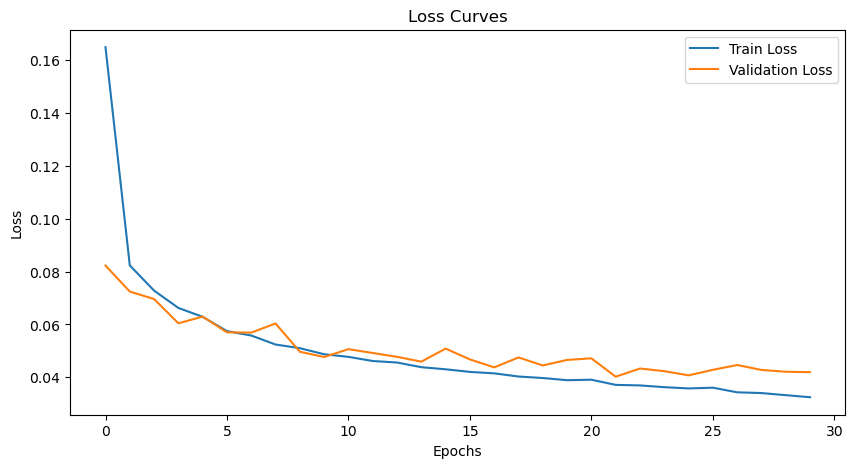

In [134]:
# Plotear las curvas de pérdida

plt.figure(figsize=(10, 5))
plt.plot(curves["train_loss"], label='Train Loss')
plt.plot(curves["val_loss"], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

In [132]:
embeddings_test_mcdsvdd = []

model_mcdsvdd.eval()

with torch.no_grad():
        for inputs in X_test_tensor:
            inputs=inputs.unsqueeze(0)
            z = model_mcdsvdd.forward(inputs)
            embeddings_test_mcdsvdd.append(z.squeeze(0).cpu().numpy())

In [110]:
# Recuperar nombres de clases originales
class_names = label_encoder.inverse_transform(np.unique(y_test_encoded))

### Visualización de clusters


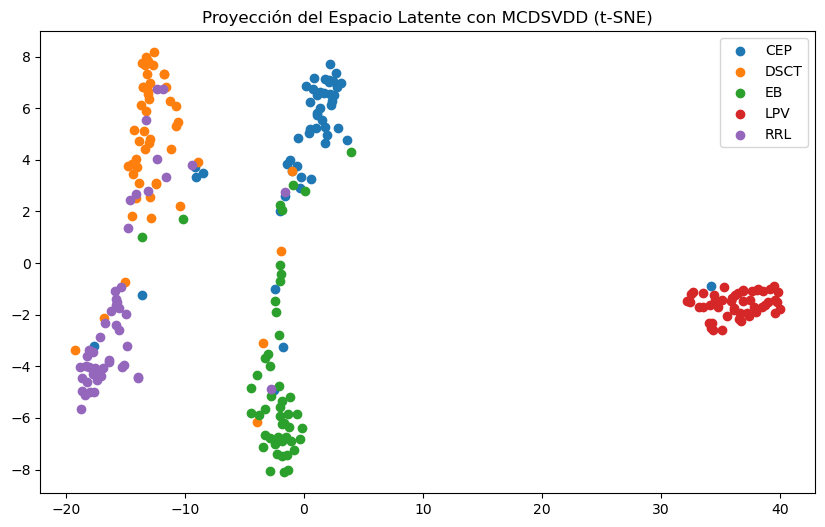

In [133]:
from sklearn.manifold import TSNE

# Obtener el espacio latente para el conjunto de prueba
latents, labels = embeddings_test_mcdsvdd, y_test_tensor

# Reducir dimensiones con t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(np.array(latents))

plt.figure(figsize=(10, 6))
for label in np.unique(labels.numpy()):
    points = latent_2d[labels.numpy() == label]
    class_name = label_encoder.inverse_transform([label])[0]  # Obtener nombre de clase
    plt.scatter(points[:, 0], points[:, 1], label=f"{class_name}")
plt.legend()
plt.title("Proyección del Espacio Latente con MCDSVDD (t-SNE)")
plt.show()

c:\anaconda3\envs\proyecto\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


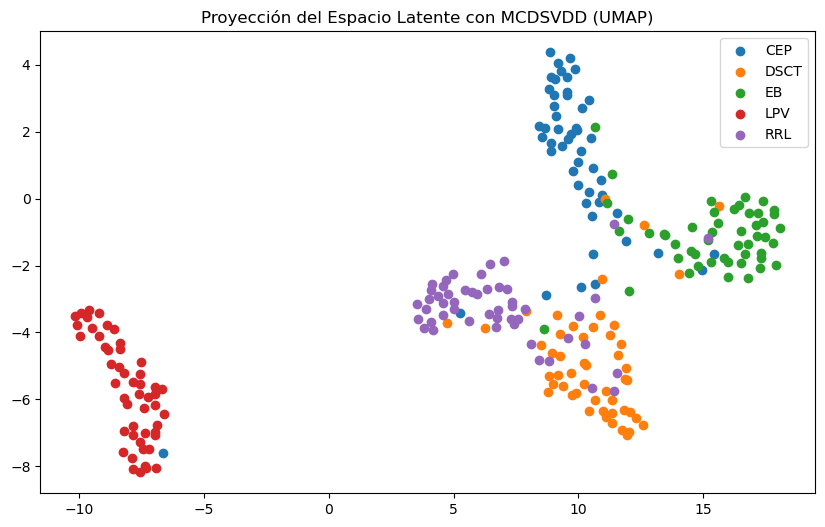

In [149]:
import umap

latents, labels = model_mcdsvdd.get_latent_space(test_loader_mcdsvdd)
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, 
                    min_dist=0.7, spread=1)
latent_2d = reducer.fit_transform(latents.numpy())

plt.figure(figsize=(10, 6))
for label in np.unique(labels):
    class_name = label_encoder.inverse_transform([label])[0]  # Obtener nombre de clase
    plt.scatter(latent_2d[labels == label, 0], latent_2d[labels == label, 1], label=f"{class_name}")
plt.legend()
plt.title("Proyección del Espacio Latente con MCDSVDD (UMAP)")
plt.show()

### Detección de anomalías

In [157]:
model_mcdsvdd.set_anomaly_threshold(test_loader_mcdsvdd)

Umbral de Anomalía Establecido en: 0.0645611900836229


In [158]:
# Clasificar el conjunto de prueba
test_data = torch.tensor(X_test, dtype=torch.float32).to(next(model_mcdsvdd.parameters()).device)
anomaly_predictions, anomaly_scores = model_mcdsvdd.classify_anomalies(test_data)

# Mostrar resultados
print("Predicciones de Anomalías:", anomaly_predictions)
print("Puntajes de Anomalías:", anomaly_scores)

Predicciones de Anomalías: tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False,  True,  True, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False,  True, False, False, False,
        False,  True,  True, False, F

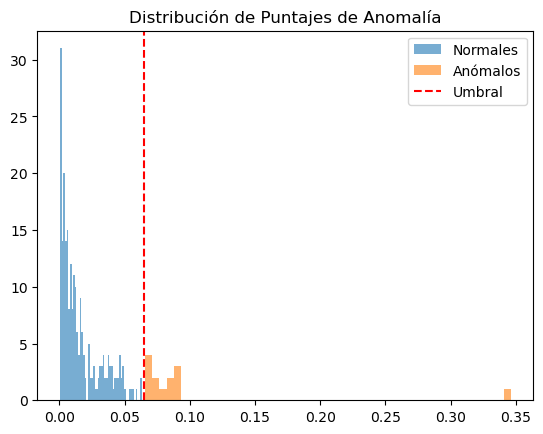

In [159]:
# Graficar histogramas de puntajes
plt.hist(anomaly_scores[~anomaly_predictions], bins=50, alpha=0.6, label="Normales")
plt.hist(anomaly_scores[anomaly_predictions], bins=50, alpha=0.6, label="Anómalos")
plt.axvline(model_mcdsvdd.anomaly_threshold, color='red', linestyle='dashed', label="Umbral")
plt.legend()
plt.title("Distribución de Puntajes de Anomalía")
plt.show()

In [171]:
# Crear un DataFrame con los datos de prueba, los puntajes y las predicciones
df_test_mc = pd.DataFrame({
    'oid': df_test['oid'],  # Sustituye con la columna que contiene los IDs únicos de tus objetos 
    'anomaly_score': anomaly_scores.cpu().numpy(),
    'is_anomaly': anomaly_predictions.cpu().numpy(),
    'class': y_test
})

# Filtrar solo las anomalías
anomalies = df_test_mc[df_test_mc['is_anomaly'] == True]

# Seleccionar las 5 anomalías con mayor puntaje
top_5_anomalies = anomalies.nlargest(5, 'anomaly_score')
print("Top 5 anomalías:")
print(top_5_anomalies)

Top 5 anomalías:
              oid  anomaly_score  is_anomaly class
122  ZTF18acsznrn       0.346223        True    EB
116  ZTF18aaztmzd       0.093308        True    EB
104  ZTF19aauenjj       0.091883        True    EB
121  ZTF18abcudsi       0.090558        True    EB
167  ZTF18abnonsq       0.087527        True   LPV


In [161]:
# Dataframe de los datos originales (X_test y IDs)
df_test_mc['anomaly_score'] = anomaly_scores.cpu().numpy()
df_test_mc['is_anomaly'] = anomaly_predictions.cpu().numpy()

# Mostrar solo las anomalías
anomalies = df_test_mc[df_test_mc['is_anomaly'] == True]
print("Objetos anómalos detectados:")
anomalies

Objetos anómalos detectados:


,oid,anomaly_score,is_anomaly,class
23,ZTF18abcocjn,0.069061,True,CEP
25,ZTF18abevwjk,0.075107,True,CEP
26,ZTF17aabvfic,0.066927,True,CEP
34,ZTF21aaatwek,0.078352,True,CEP
43,ZTF17aaawghi,0.072181,True,CEP
57,ZTF19aauaszn,0.087103,True,DSCT
86,ZTF19actguzz,0.065440,True,DSCT
104,ZTF19aauenjj,0.091883,True,EB
108,ZTF18abbxkox,0.068019,True,EB
116,ZTF18aaztmzd,0.093308,True,EB


## Curvas de luz

### CEP

C:\Users\icali\AppData\Local\Temp\ipykernel_10156\920637296.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_10156\920637296.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


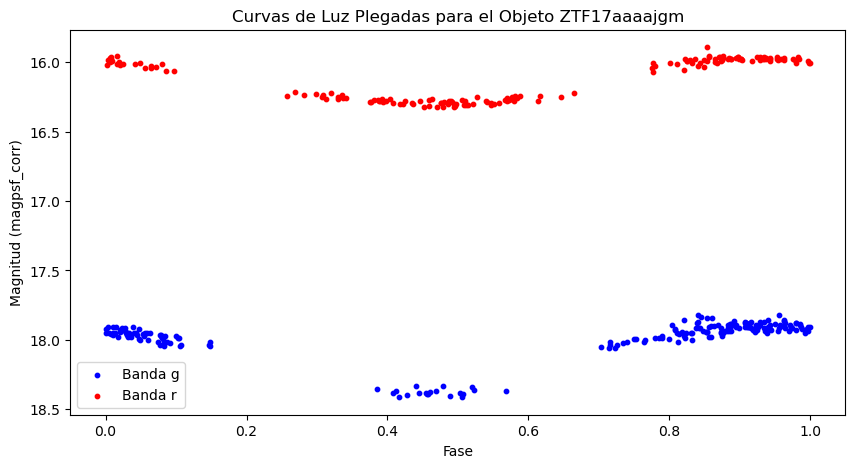

In [8]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF17aaaajgm'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### DSCT

C:\Users\icali\AppData\Local\Temp\ipykernel_10156\3641368449.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_10156\3641368449.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


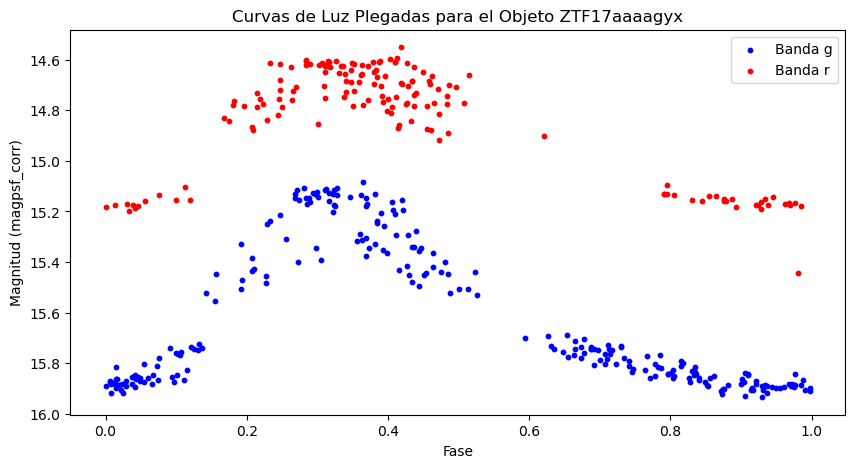

In [5]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF17aaaagyx'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### LPV

C:\Users\icali\AppData\Local\Temp\ipykernel_10156\1515203788.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_10156\1515203788.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


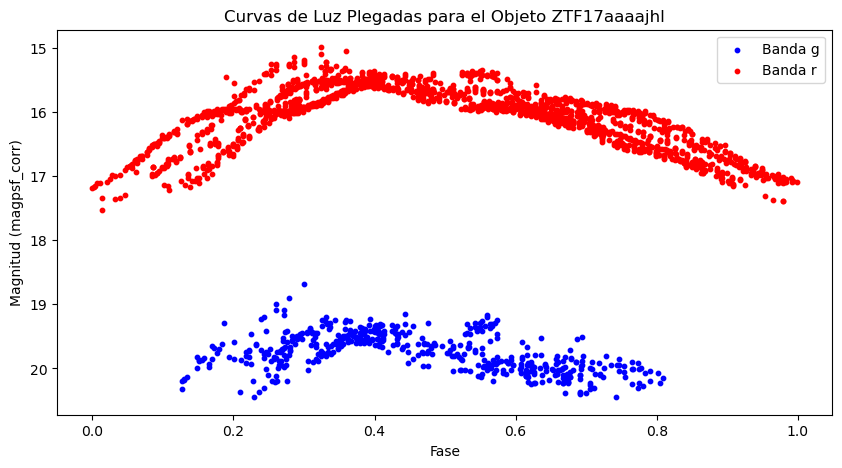

In [10]:
oid_interes= "ZTF17aaaajhl"
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')


# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### EB

C:\Users\icali\AppData\Local\Temp\ipykernel_16756\203273769.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_16756\203273769.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


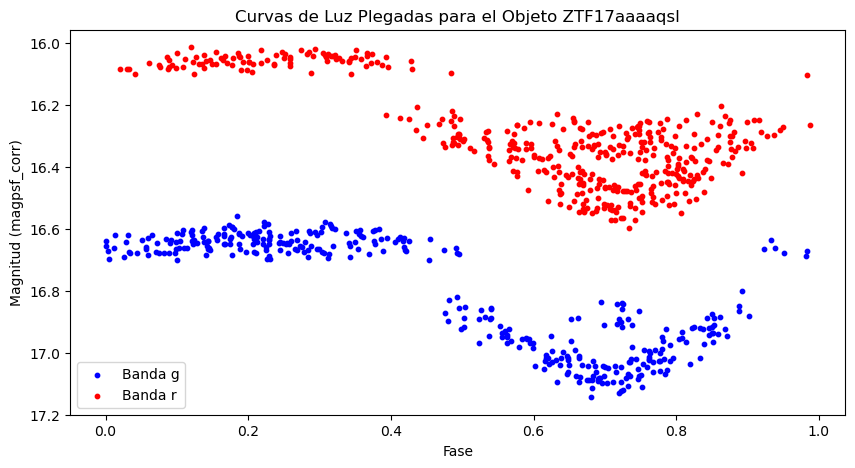

In [11]:
oid_interes = "ZTF17aaaaqsl"
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')


# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### RRL


C:\Users\icali\AppData\Local\Temp\ipykernel_16756\697938712.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_16756\697938712.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


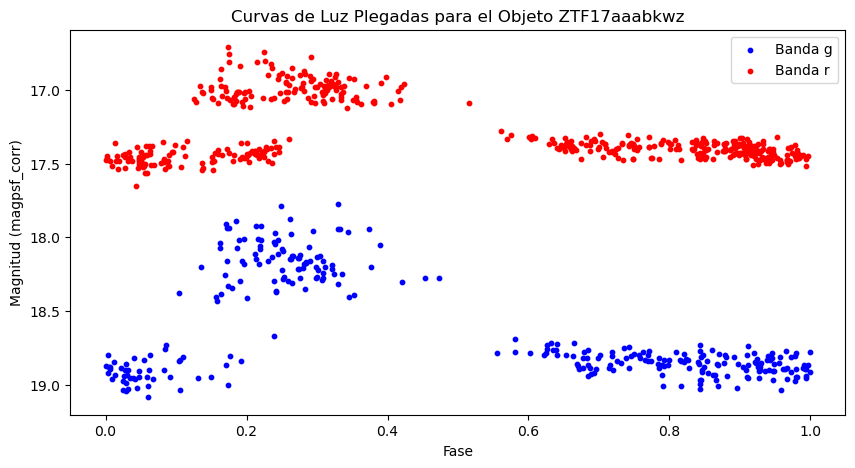

In [12]:
oid_interes = "ZTF17aaabkwz"
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')


# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

## Curvas anomalías


### Curva Anomalía: CEP


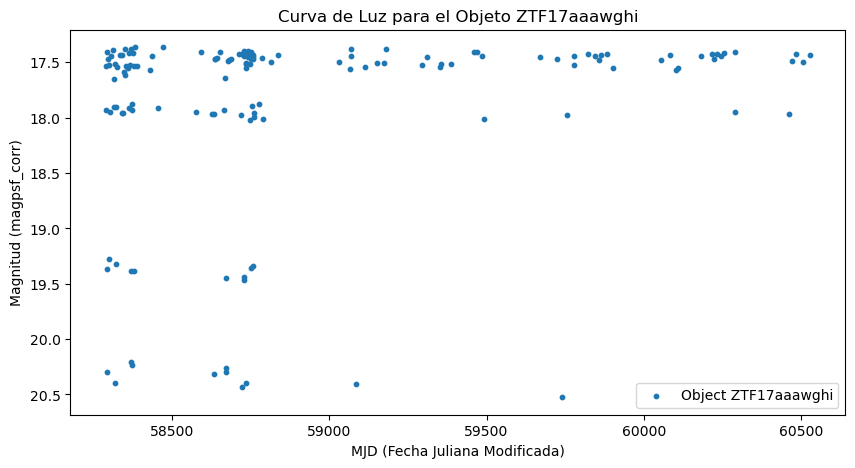

In [172]:
oid = "ZTF17aaawghi"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\icali\AppData\Local\Temp\ipykernel_19316\3473681888.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_19316\3473681888.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


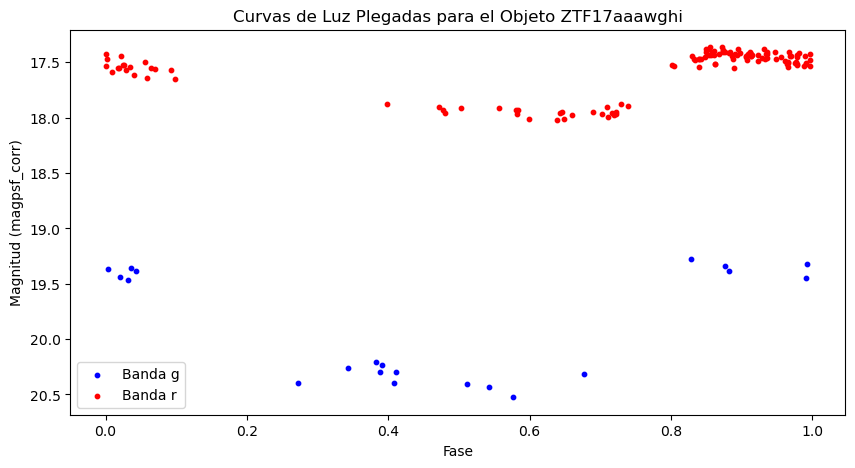

In [173]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF17aaawghi'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### Curva Anomalia: DSCT


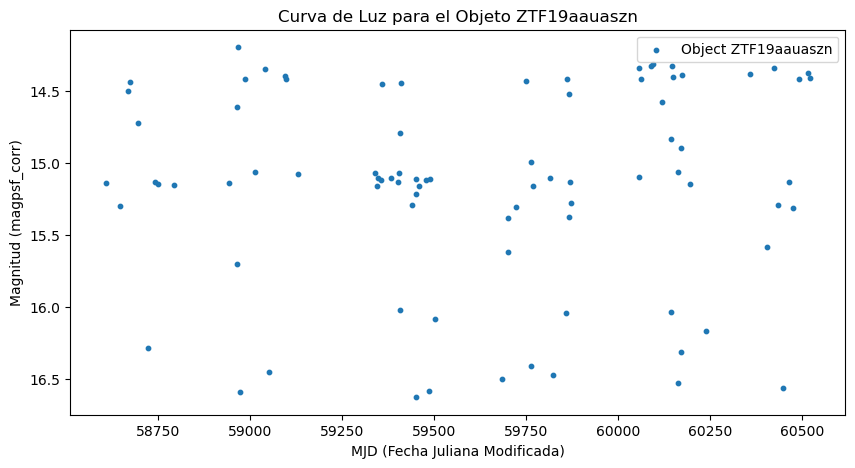

In [174]:
oid = "ZTF19aauaszn"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\icali\AppData\Local\Temp\ipykernel_19316\3105447083.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_19316\3105447083.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


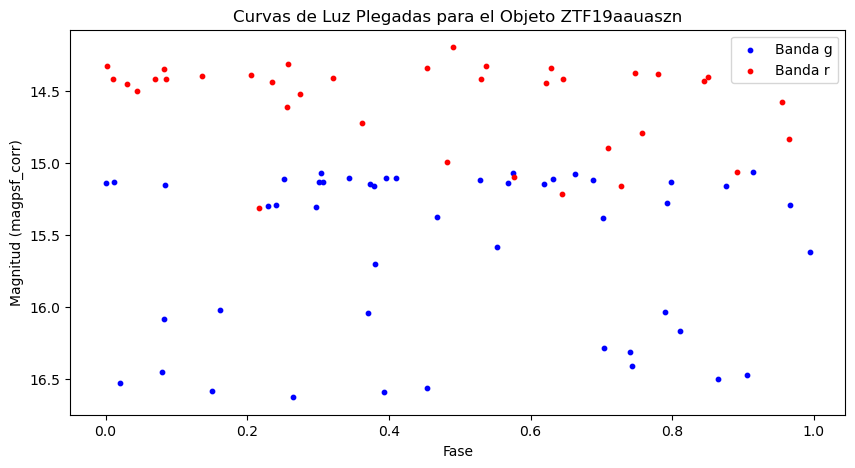

In [175]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF19aauaszn'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### Curva Anomalia: LVP

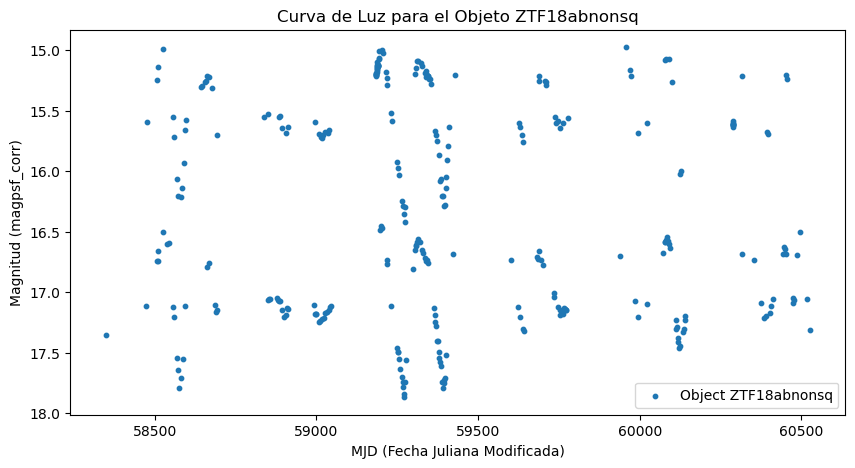

In [176]:
oid = "ZTF18abnonsq"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\icali\AppData\Local\Temp\ipykernel_19316\2821998966.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_19316\2821998966.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


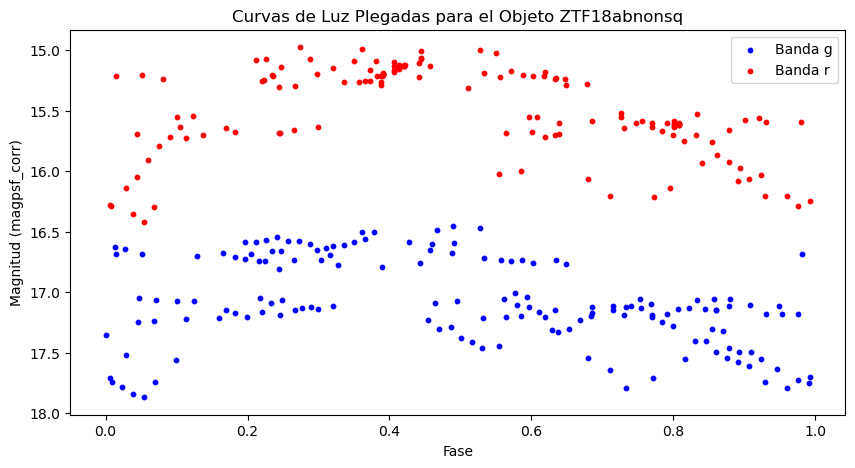

In [177]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF18abnonsq'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")

### Curva Anomalia: EB

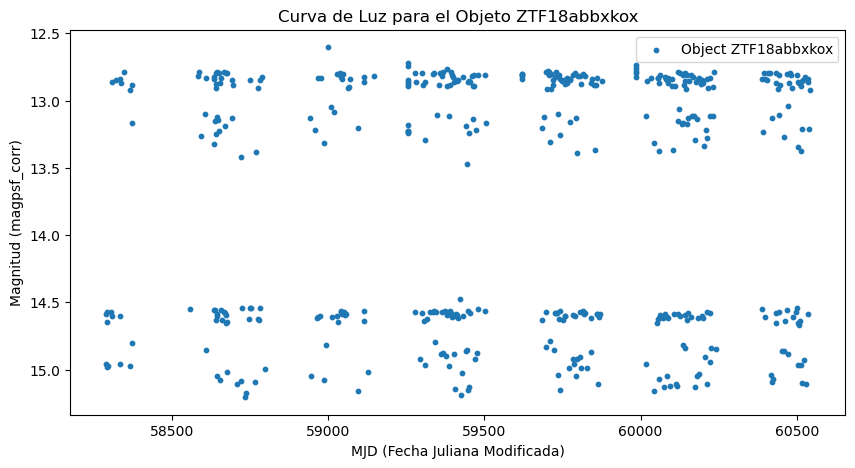

In [6]:
oid = "ZTF18abbxkox"

# Filtrar el dataframe para el objeto actual
star_data = lcs[lcs['oid'] == oid]

# Columnas de tiempo y magnitud
time = star_data['mjd']
magnitude = star_data['magpsf_corr']  # 'magpsf': Sin correxión

# Curva de luz
plt.figure(figsize=(10, 5))
plt.scatter(time, magnitude, s=10, label=f"Object {oid}")
plt.xlabel('MJD (Fecha Juliana Modificada)')
plt.ylabel('Magnitud (magpsf_corr)')
plt.title(f'Curva de Luz para el Objeto {oid}')
plt.gca().invert_yaxis()  # Las magnitudes son inversas (más bajo es más brillante)
plt.legend()
plt.show()

C:\Users\icali\AppData\Local\Temp\ipykernel_16756\2113790569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
C:\Users\icali\AppData\Local\Temp\ipykernel_16756\2113790569.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1


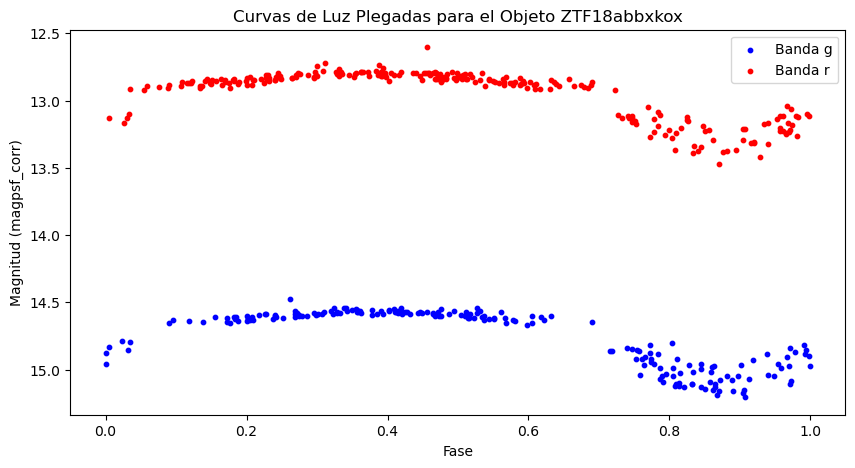

In [7]:
# Fusionar los DataFrames en base a la columna 'oid'
df_merged = pd.merge(lcs, feats[['oid', 'Multiband_period_g_r', 'Period_band_g', 'Period_band_r']], on='oid', how='left')

# Seleccionar el 'oid' del objeto que deseas analizar
oid_interes = 'ZTF18abbxkox'

# Filtrar los datos para el 'oid' seleccionado
datos_estrella = df_merged[df_merged['oid'] == oid_interes]

# Verificar que hay datos disponibles para el 'oid' seleccionado
if not datos_estrella.empty:
    # Calcular la fase para cada observación
    mjd_0 = datos_estrella['mjd'].min()  # Época de referencia

    # Crear una columna de fase para cada banda
    datos_estrella['fase_g'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_g']) % 1
    datos_estrella['fase_r'] = ((datos_estrella['mjd'] - mjd_0) / datos_estrella['Period_band_r']) % 1

    # Filtrar por banda utilizando 'fid' (1 para g, 2 para r)
    datos_g = datos_estrella[datos_estrella['fid'] == 1]
    datos_r = datos_estrella[datos_estrella['fid'] == 2]

    # Graficar las curvas de luz plegadas
    plt.figure(figsize=(10, 5))
    if not datos_g.empty:
        plt.scatter(datos_g['fase_g'], datos_g['magpsf_corr'], s=10, color='blue', label='Banda g')
    if not datos_r.empty:
        plt.scatter(datos_r['fase_r'], datos_r['magpsf_corr'], s=10, color='red', label='Banda r')
    plt.xlabel('Fase')
    plt.ylabel('Magnitud (magpsf_corr)')
    plt.title(f'Curvas de Luz Plegadas para el Objeto {oid_interes}')
    plt.gca().invert_yaxis()  # Las magnitudes son inversas
    plt.legend()
    plt.show()
else:
    print(f"No se encontraron datos para el objeto con oid {oid_interes}.")